In [2]:


for i in range(1000, 2000):
    r = requests.get('http://www.etnet.com.hk/mobile/tc/lifestyle/showrandimg.php?v=1', stream=True)
    if r.status_code == 200:
        filename = 'captcha/img{}.png'.format(i)
        with open(filename, 'wb') as out_file:
            shutil.copyfileobj(r.raw, out_file)
    time.sleep(0.05)

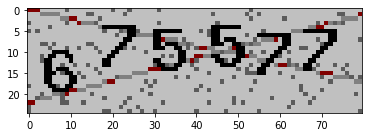

Labelled: 3, Remaining: 1921


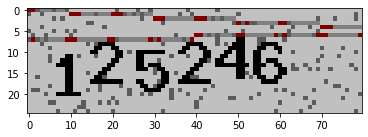

Labelled: 4, Remaining: 1921


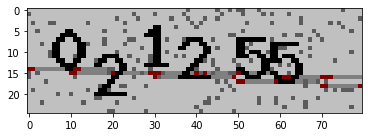

Labelled: 5, Remaining: 1921


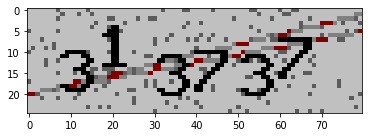

Labelled: 6, Remaining: 1921


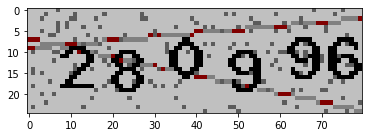

Labelled: 7, Remaining: 1921


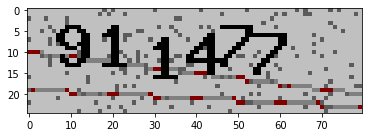

Labelled: 8, Remaining: 1921


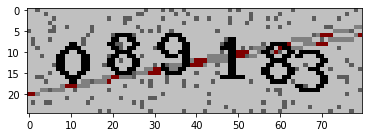

Labelled: 9, Remaining: 1921


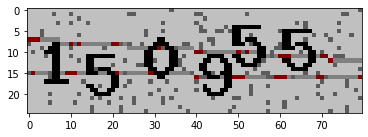

Labelled: 10, Remaining: 1921


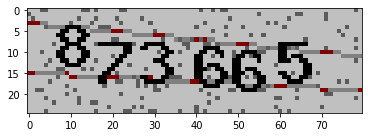

Labelled: 11, Remaining: 1921


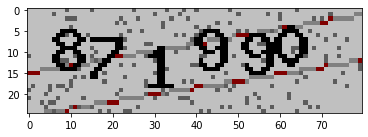

In [16]:
import requests
import shutil
import time
from os import listdir
from os.path import isfile, join
from PIL import Image

files = [f for f in listdir('captcha') if 'img' in f]

for f in files:

    img = plt.imread('captcha/{}'.format(f))
    imgplot = plt.imshow(img)
    
    plt.show()
    
    # get label
    label = input()

    if label == '':
        break

    os.rename('captcha/{}'.format(f), 'captcha/{}.png'.format(label))
    labels = [f for f in listdir('captcha') if not 'img' in f]

    print("Labelled: {}, Remaining: {}".format(len(labels), len(files)))

In [17]:
labels = [f for f in listdir('preprocess') if not 'img' in f]
print('Number of labels: {}'.format(len(labels)))

Number of labels: 163


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%load_ext tensorboard
import datetime
from tensorboard.plugins.hparams import api as hp
from sklearn.model_selection import train_test_split
import cv2
from os import listdir
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from sklearn.preprocessing import LabelBinarizer
import random

Using TensorFlow backend.


In [10]:
# get all the files in preprocess
files = [f for f in listdir('preprocess') if not 'img' in f]

counts = {}

for file in files[:10]:
    # get image 
    img = cv2.imread('preprocess\\{}'.format(file))

    # get correct catcha text by image filename
    correct_captcha_text = file.split('.')[0]

    #convet to black and gray
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

    # remove the white background
    ret, binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)  

    # find the margins of each character
    contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    letter_boxes = []
    trash = []
    cache = ()

    # loop over each margin
    for contour in contours:

        # use a rectangle to bound the margin
        (x, y, w, h) = cv2.boundingRect(contour)

        #print(w * h, (x, y, w, h))
        
        # add only external border box
        # for w < 4 and h < 6, there are the inner boxes that should be excluded
        if w > 4 and h > 6 and x != 0 and y != 0:
            if (w * h) > 95:
                if w > h:
                    half_width = int(w / 2)
                    letter_boxes.append((x, y, half_width, h))
                    letter_boxes.append((x + half_width, y, half_width, h))
                else:
                    letter_boxes.append((x, y, w, h))
            elif w * h > 60:
                # if area > 6, it may be a part of 5
                if len(cache):
                    # get part of the 5 and merge with another part
                    x1, y1, w1, h1 = cache
                    letter_boxes.append((min(x,x1), min(y,y1), 10, 12))
                else:
                    cache = (x, y, w, h)

    # sort by x coordinates so that it is from left to right
    letter_boxes = sorted(letter_boxes, key=lambda x: x[0])

    # if we could not split 6 digits, skip this sample
    if len(letter_boxes) != 6:
        continue

    for i,letter_box in  enumerate(letter_boxes):
        
        x, y, w, h = letter_box

        letter_image = binary[y:y+h,x:x+w]
        letter_text = correct_captcha_text[i]

        #imgplot = plt.imshow(letter_image)
    
        #plt.show()
        """print(w * h, (x, y, w, h), letter_text)
        #cv2.rectangle(binary, (x,y), (x+w,y+h), (0,123,255),1)
        
        cv2.namedWindow('image',cv2.WINDOW_NORMAL)
        cv2.resizeWindow('image', 25 * 5, 25*5)
        cv2.imshow('image', letter_image)
        #cv2.imshow('image', letter_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        """
        #save_path = os.path.join('ready/', letter_text)
        
        # if the output directory does not exist, create it
        """if not os.path.exists(save_path):
            os.makedirs(save_path)"""

        # write the letter image to a file
        #count = counts.get(letter_text, 1)
        p = os.path.join('ready/', "{}{}.png".format(letter_text, int(random.random()*10000)))
        #cv2.imwrite(p, letter_image)

        # increment the count for the current key
        #count = count + 1



12
12
12
17
17
12
12
12
12
12
12
12
12
12
12
12
13
13
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
16
16
12
12
16
16
12
12
12


In [ ]:
def segment_image(img):
    images = []

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

    # remove the white background
    ret, binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)  

    # find the margins of each character
    contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    letter_boxes = []
    cache = ()

    # loop over each margin
    for contour in contours:

        # use a rectangle to bound the margin
        (x, y, w, h) = cv2.boundingRect(contour)
        
        # add only external border box
        # for w < 4 and h < 6, there are the inner boxes that should be excluded
        if w > 4 and h > 6 and x != 0 and y != 0:
            if (w * h) > 95:
                if w > h:
                    half_width = int(w / 2)
                    letter_boxes.append((x, y, half_width, h))
                    letter_boxes.append((x + half_width, y, half_width, h))
                else:
                    letter_boxes.append((x, y, w, h))
            elif w * h > 60:
                # if area > 6, it may be a part of 5
                if len(cache):
                    # get part of the 5 and merge with another part
                    x1, y1, w1, h1 = cache
                    letter_boxes.append((min(x,x1), min(y,y1), 10, 12))
                else:
                    cache = (x, y, w, h)

    # sort by x coordinates so that it is from left to right
    letter_boxes = sorted(letter_boxes, key=lambda x: x[0])

    # if we could not split 6 digits, skip this sample
    if len(letter_boxes) != 6:
        continue

    for i,letter_box in  enumerate(letter_boxes):
        
        x, y, w, h = letter_box

        letter_image = binary[y:y+h,x:x+w]

        images.append(letter_images)

    return images